In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3


In [24]:
import pandas as pd

dfc = pd.read_csv('/root/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3/application_record.csv')


In [25]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3/credit_record.csv')


In [26]:
print(len(dfc))
ids_to_drop = dfc[~dfc['ID'].isin(df['ID'])]['ID'].tolist()
dfc = dfc[~dfc['ID'].isin(ids_to_drop)]
print(len(dfc))

438557
36457


In [27]:

df_filtered = df[df['STATUS'] != 'C']
df_filtered = df_filtered[df_filtered['STATUS'] != 'X']
df_filtered.dropna(inplace=True)
df_filtered['MONTHS_BALANCE'] = df_filtered['MONTHS_BALANCE'].astype(int)

recent_months = df_filtered[df_filtered['MONTHS_BALANCE'] >= -12]
recent_months = recent_months[recent_months['STATUS'].apply(lambda x: str(x).isdigit())]
recent_months['STATUS'] = pd.to_numeric(recent_months['STATUS'], errors='coerce')
recent_months.fillna(0, inplace=True)
grouped_data = recent_months.groupby('ID').agg(
    bad_months=('STATUS', lambda x: sum(x > 1))
)

bad_history_threshold = 3
grouped_data['label'] = grouped_data.apply(lambda x: 'bad' if x['bad_months'] >= bad_history_threshold else 'good', axis=1)
dfc = dfc.merge(grouped_data, on='ID', how='left')
dfc['label'].fillna('bad', inplace=True)
dfc

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad_months,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,NaN,bad
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,NaN,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,4.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,8.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,NaN,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1.0,good


In [28]:
print(len(dfc[dfc['label'] == "good"]))
print(len(dfc[dfc['label'] == "bad"]))
print(len(dfc))

dfc

15691
20766
36457


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad_months,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,NaN,bad
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,NaN,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,4.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,8.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,NaN,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1.0,good


In [29]:


import pandas as pd
import numpy as np

def calc_iv(df, feature, target):
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 'good')].count()[feature], df[(df[feature] == val) & (df[target] == 'bad')].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['Distribution Good'] - data['Distribution Bad']) * data['WoE']
    iv = data['IV'].sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)
    return iv, data

ivtable = pd.DataFrame({'variable':[], 'IV':[]})

new_data = dfc.copy()

new_data.loc[new_data['FLAG_OWN_CAR']=='Y','FLAG_OWN_CAR']='Yes'
new_data.loc[new_data['FLAG_OWN_CAR']=='N','FLAG_OWN_CAR']='No'
new_data.loc[new_data['FLAG_OWN_REALTY']=='Y','FLAG_OWN_REALTY']='Yes'
new_data.loc[new_data['FLAG_OWN_REALTY']=='N','FLAG_OWN_REALTY']='No'
new_data.loc[new_data['NAME_INCOME_TYPE']=='Working','NAME_INCOME_TYPE']='Commercial associate'
new_data.loc[new_data['NAME_INCOME_TYPE']=='Pensioner','NAME_INCOME_TYPE']='State servant'
new_data.loc[new_data['NAME_INCOME_TYPE']=='State servant','NAME_INCOME_TYPE']='State servant'

new_data.loc[new_data['NAME_EDUCATION_TYPE']=='Academic degree','NAME_EDUCATION_TYPE']='Higher education'
new_data.loc[new_data['NAME_EDUCATION_TYPE']=='Higher education','NAME_EDUCATION_TYPE']='Higher education'
new_data.loc[new_data['NAME_EDUCATION_TYPE']=='Incomplete higher','NAME_EDUCATION_TYPE']='Secondary / secondary special'
new_data.loc[new_data['NAME_EDUCATION_TYPE']=='Lower secondary','NAME_EDUCATION_TYPE']='Secondary / secondary special'

new_data.loc[new_data['NAME_FAMILY_STATUS']=='Civil marriage','NAME_FAMILY_STATUS']='Married'
new_data.loc[new_data['NAME_FAMILY_STATUS']=='Single / not married','NAME_FAMILY_STATUS']='Single / not married'
new_data.loc[new_data['NAME_FAMILY_STATUS']=='Separated','NAME_FAMILY_STATUS']='Single / not married'
new_data.loc[new_data['NAME_FAMILY_STATUS']=='Widow','NAME_FAMILY_STATUS']='Single / not married'

iv, data=calc_iv(new_data,'NAME_EDUCATION_TYPE','label')
ivtable.loc[ivtable['variable']=='NAME_EDUCATION_TYPE','IV']=iv
data

,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,NAME_EDUCATION_TYPE,Higher education,9896,4125,5771,0.271443,0.583165,0.26289,0.277906,-0.055550,0.000834
1,NAME_EDUCATION_TYPE,Secondary / secondary special,26561,11566,14995,0.728557,0.564550,0.73711,0.722094,0.020583,0.000309


In [30]:

# categorical data
dfc['CODE_GENDER'] = dfc['CODE_GENDER'].map({'F': 1, 'M': 0})

dfc['FLAG_OWN_CAR'] = dfc['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
dfc['FLAG_OWN_REALTY'] = dfc['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
dfc['NAME_INCOME_TYPE'] = dfc['NAME_INCOME_TYPE'].map({'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3, 'Student': 4})
dfc['NAME_EDUCATION_TYPE'] = dfc['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4})
dfc['NAME_FAMILY_STATUS'] = dfc['NAME_FAMILY_STATUS'].map({'Married': 0, 'Single / not married': 1, 'Civil marriage': 2, 'Separated': 3, 'Widow': 4})
dfc['NAME_HOUSING_TYPE'] = dfc['NAME_HOUSING_TYPE'].map({'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2, 'Rented apartment': 3, 'Co-op apartment': 4})
dfc = dfc.drop('NAME_HOUSING_TYPE', axis=1)
dfc = dfc.drop('CNT_FAM_MEMBERS', axis=1)

In [31]:

max_income = dfc['AMT_INCOME_TOTAL'].max()
min_income = dfc['AMT_INCOME_TOTAL'].min()
avg_income = dfc['AMT_INCOME_TOTAL'].mean()

print(f"Maximum income: {max_income}")
print(f"Minimum income: {min_income}")
print(f"Average income: {avg_income}")

Maximum income: 1575000.0
Minimum income: 27000.0
Average income: 186685.73666236937


In [32]:
thresholds = dfc['AMT_INCOME_TOTAL'].quantile([0.33, 0.66])

def assign_income_class(income):
    if income <= thresholds[0.33]:
        return '0'
    elif income <= thresholds[0.66]:
        return '1'
    else:
        return '2'

dfc['income_class'] = dfc['AMT_INCOME_TOTAL'].apply(assign_income_class)
print(dfc[['AMT_INCOME_TOTAL', 'income_class']].head())
dfc = dfc.drop('AMT_INCOME_TOTAL', axis=1)
dfc = dfc.drop('bad_months', axis=1)

   AMT_INCOME_TOTAL income_class
0          427500.0            2
1          427500.0            2
2          112500.0            0
3          270000.0            2
4          270000.0            2


In [33]:
import numpy as np
dfc['AGE'] = (dfc['DAYS_BIRTH'] / -365).astype(int)
print(dfc[['DAYS_BIRTH', 'AGE']].head())
bins = [18, 30, 50, np.inf]
labels = ['0', '1', '2']
dfc['AGE_CATEGORY'] = pd.cut(dfc['AGE'], bins=bins, labels=labels, right=False)

print(dfc[['DAYS_BIRTH', 'AGE', 'AGE_CATEGORY']].head())
dfc = dfc.drop('DAYS_BIRTH', axis=1)
dfc = dfc.drop('AGE', axis=1)
dfc = dfc.drop('FLAG_EMAIL', axis=1)
dfc = dfc.drop('FLAG_PHONE', axis=1)
dfc = dfc.drop('FLAG_WORK_PHONE', axis=1)
dfc = dfc.drop('FLAG_MOBIL', axis=1)


   DAYS_BIRTH  AGE
0      -12005   32
1      -12005   32
2      -21474   58
3      -19110   52
4      -19110   52
   DAYS_BIRTH  AGE AGE_CATEGORY
0      -12005   32            1
1      -12005   32            1
2      -21474   58            2
3      -19110   52            2
4      -19110   52            2


In [34]:
dfc

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,label,income_class,AGE_CATEGORY
0,5008804,0,1,1,0,0,1,2,-4542,NaN,bad,2,1
1,5008805,0,1,1,0,0,1,2,-4542,NaN,good,2,1
2,5008806,0,1,1,0,0,0,0,-1134,Security staff,good,0,2
3,5008808,1,0,1,0,1,0,1,-3051,Sales staff,good,2,2
4,5008809,1,0,1,0,1,0,1,-3051,Sales staff,bad,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,1,1,0,0,0,0,-2420,Managers,bad,2,1
36453,5149834,1,0,1,0,1,1,0,-1325,Medicine staff,bad,1,1
36454,5149838,1,0,1,0,2,1,0,-1325,Medicine staff,bad,1,1
36455,5150049,1,0,1,0,0,0,0,-655,Sales staff,good,2,1


In [35]:
employed_dfc = dfc[dfc['DAYS_EMPLOYED'] < 0]
average_employment_time = employed_dfc['DAYS_EMPLOYED'].mean()

print(f"Average employment time (excluding unemployed): {average_employment_time}")
print(employed_dfc['DAYS_EMPLOYED'].min())

Average employment time (excluding unemployed): -2645.5036936877514
-15713


In [36]:
def categorize_days_employed(days_employed):
    if days_employed < -2645:
        return 0
    elif days_employed >= 0:
        return 2
    else:
        return 1
dfc['DAYS_EMPLOYED_CATEGORY'] = dfc['DAYS_EMPLOYED'].apply(categorize_days_employed)

print(dfc[['DAYS_EMPLOYED', 'DAYS_EMPLOYED_CATEGORY']].head())
dfc = dfc.drop('DAYS_EMPLOYED', axis = 1)
dfc = dfc.drop('NAME_FAMILY_STATUS', axis = 1)
dfc = dfc.drop('CODE_GENDER', axis = 1)
dfc = dfc.drop('CNT_CHILDREN', axis = 1)
dfc = dfc.drop('DAYS_EMPLOYED_CATEGORY', axis = 1)
dfc = dfc.drop('NAME_INCOME_TYPE', axis = 1)

   DAYS_EMPLOYED  DAYS_EMPLOYED_CATEGORY
0          -4542                       0
1          -4542                       0
2          -1134                       1
3          -3051                       0
4          -3051                       0


In [37]:
unique_occupations = dfc['OCCUPATION_TYPE'].unique()
unique_occupations

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [38]:
occupation_mapping = {
    'Sales staff': 2,
    'Managers': 2,
    'High skill tech staff': 2,
    'Medicine staff': 2,
    'HR staff': 2,
    'Realty agents': 2,
    'Accountants': 1,
    'Laborers': 1,
    'Core staff': 1,
    'Private service staff': 1,
    'Cooking staff': 1,
    'Secretaries': 1,
    'IT staff': 1,
    'NaN':0,
    'Security staff': 0,
    'Drivers': 0,
    'Cleaning staff': 0,
    'Low-skill Laborers': 0,
    'Waiters/barmen staff': 0
}

dfc['OCCUPATION_TYPE'] = dfc['OCCUPATION_TYPE'].map(occupation_mapping).fillna(0)
dfc['label'] = dfc['label'].map({'good': 1, 'bad': 0})

In [39]:
print(len(dfc))
dfc = dfc.drop('ID', axis=1)
dfc

36457


,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,label,income_class,AGE_CATEGORY
0,1,1,1,0.0,0,2,1
1,1,1,1,0.0,1,2,1
2,1,1,0,0.0,1,0,2
3,0,1,0,2.0,1,2,2
4,0,1,0,2.0,0,2,2
...,...,...,...,...,...,...,...
36452,1,1,0,2.0,0,2,1
36453,0,1,1,2.0,0,1,1
36454,0,1,1,2.0,0,1,1
36455,0,1,0,2.0,1,2,1


In [40]:
print(len(dfc))
print(len(dfc[dfc['label'] == 1]))
print(len(dfc[dfc['label'] == 0]))
dfc

36457
15691
20766


,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,label,income_class,AGE_CATEGORY
0,1,1,1,0.0,0,2,1
1,1,1,1,0.0,1,2,1
2,1,1,0,0.0,1,0,2
3,0,1,0,2.0,1,2,2
4,0,1,0,2.0,0,2,2
...,...,...,...,...,...,...,...
36452,1,1,0,2.0,0,2,1
36453,0,1,1,2.0,0,1,1
36454,0,1,1,2.0,0,1,1
36455,0,1,0,2.0,1,2,1


In [41]:
dfc['NAME_EDUCATION_TYPE'] = dfc['NAME_EDUCATION_TYPE'].astype(int)
#dfc['CNT_FAM_MEMBERS'] = dfc['CNT_FAM_MEMBERS'].astype(int)
#dfc['NAME_HOUSING_TYPE'] = dfc['NAME_HOUSING_TYPE'].astype(int)
dfc['income_class'] = dfc['income_class'].astype(int)
#dfc['DAYS_EMPLOYED_CATEGORY'] = dfc['DAYS_EMPLOYED_CATEGORY'].astype(int)
dfc['OCCUPATION_TYPE'] = dfc['OCCUPATION_TYPE'].astype(int)
#dfc['CODE_GENDER'] = dfc['CODE_GENDER'].astype(int)
dfc['FLAG_OWN_CAR'] = dfc['FLAG_OWN_CAR'].astype(int)
dfc['FLAG_OWN_REALTY'] = dfc['FLAG_OWN_REALTY'].astype(int)
#dfc['NAME_INCOME_TYPE'] = dfc['NAME_INCOME_TYPE'].astype(int)
dfc['AGE_CATEGORY'] = dfc['AGE_CATEGORY'].astype(int)
#dfc['CNT_CHILDREN'] = dfc['CNT_CHILDREN'].astype(int)

dfc

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,label,income_class,AGE_CATEGORY
0,1,1,1,0,0,2,1
1,1,1,1,0,1,2,1
2,1,1,0,0,1,0,2
3,0,1,0,2,1,2,2
4,0,1,0,2,0,2,2
...,...,...,...,...,...,...,...
36452,1,1,0,2,0,2,1
36453,0,1,1,2,0,1,1
36454,0,1,1,2,0,1,1
36455,0,1,0,2,1,2,1


In [50]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


In [43]:
from sklearn.model_selection import train_test_split

# Assuming dfc is your DataFrame and 'label' is the target variable column
X = dfc.drop('label', axis=1)
y = dfc['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (29165, 6)
X_test shape: (7292, 6)
y_train shape: (29165,)
y_test shape: (7292,)


In [44]:
# prompt: write a code that writes a report about dfc dataset they datatypes of columns and so

# Generate report
def generate_report(df):
    report = f"Dataset Report:\n\n"
    report += f"Number of rows: {len(df)}\n"
    report += f"Number of columns: {len(df.columns)}\n\n"
    report += f"Column Information:\n"
    for col in df.columns:
        report += f"- {col}:\n"
        report += f"  Data type: {df[col].dtype}\n"
        report += f"  Number of unique values: {df[col].nunique()}\n"
        report += f"  Missing values: {df[col].isnull().sum()}\n"
        report += f"  Unique Values: {df[col].unique()[:10]}...\n"  # Show first 10 unique values
        report += "\n"
    return report

# Generate and print the report
report = generate_report(dfc)
print(report)

# Optionally, save the report to a file:
with open("dfc_report.txt", "w") as f:
    f.write(report)

Dataset Report:

Number of rows: 36457
Number of columns: 7

Column Information:
- FLAG_OWN_CAR:
  Data type: int64
  Number of unique values: 2
  Missing values: 0
  Unique Values: [1 0]...

- FLAG_OWN_REALTY:
  Data type: int64
  Number of unique values: 2
  Missing values: 0
  Unique Values: [1 0]...

- NAME_EDUCATION_TYPE:
  Data type: int64
  Number of unique values: 5
  Missing values: 0
  Unique Values: [1 0 2 3 4]...

- OCCUPATION_TYPE:
  Data type: int64
  Number of unique values: 3
  Missing values: 0
  Unique Values: [0 2 1]...

- label:
  Data type: int64
  Number of unique values: 2
  Missing values: 0
  Unique Values: [0 1]...

- income_class:
  Data type: int64
  Number of unique values: 3
  Missing values: 0
  Unique Values: [2 0 1]...

- AGE_CATEGORY:
  Data type: int64
  Number of unique values: 3
  Missing values: 0
  Unique Values: [1 2 0]...




In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg_model = LogisticRegression(max_iter=10)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5703510696653867
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      4159
           1       0.00      0.00      0.00      3133

    accuracy                           0.57      7292
   macro avg       0.29      0.50      0.36      7292
weighted avg       0.33      0.57      0.41      7292



In [46]:
# prompt: apply random forest algorithm

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.5733680746023039
              precision    recall  f1-score   support

           0       0.58      0.92      0.71      4159
           1       0.52      0.12      0.19      3133

    accuracy                           0.57      7292
   macro avg       0.55      0.52      0.45      7292
weighted avg       0.55      0.57      0.49      7292



In [51]:
# prompt: comment on the randomforestclassifier

# Initialize and train the RandomForestClassifier
# n_estimators: The number of trees in the forest.
# random_state: Controls both the randomness of the bootstrapping of the samples used when building trees
#               and the sampling of the features to consider when looking for the best split at each node.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.5733680746023039
              precision    recall  f1-score   support

           0       0.58      0.92      0.71      4159
           1       0.52      0.12      0.19      3133

    accuracy                           0.57      7292
   macro avg       0.55      0.52      0.45      7292
weighted avg       0.55      0.57      0.49      7292



SVM Accuracy: 0.5718595721338453
              precision    recall  f1-score   support

           0       0.57      0.96      0.72      4159
           1       0.52      0.06      0.10      3133

    accuracy                           0.57      7292
   macro avg       0.55      0.51      0.41      7292
weighted avg       0.55      0.57      0.45      7292

Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score for SVM: 0.5704097376992971
Best SVM Accuracy: 0.5718595721338453
              precision    recall  f1-score   support

           0       0.57      0.96      0.72      4159
           1       0.52      0.06      0.10      3133

    accuracy                           0.57      7292
   macro avg       0.55      0.51      0.41      7292
weighted avg       0.55      0.57      0.45      7292

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.569415395165438
Best Logi

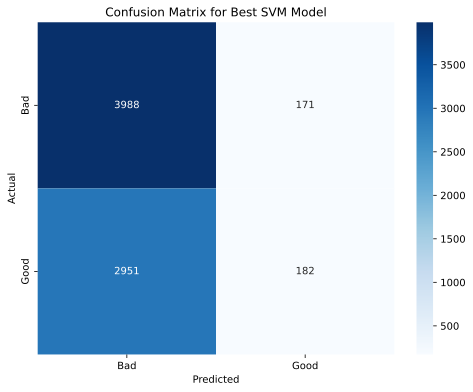

In [47]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize and train the Support Vector Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


# Hyperparameter Tuning using GridSearchCV for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM:", grid_search_svm.best_score_)

best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)


print(f"Best SVM Accuracy: {accuracy_score(y_test,y_pred_best_svm)}")
print(classification_report(y_test, y_pred_best_svm))


# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # 'l1' penalty can only be used with these solvers
}
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

print("Best Hyperparameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best Score for Logistic Regression:", grid_search_logreg.best_score_)

best_logreg_model = grid_search_logreg.best_estimator_
y_pred_best_logreg = best_logreg_model.predict(X_test)

print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test,y_pred_best_logreg)}")
print(classification_report(y_test,y_pred_best_logreg))


# Hyperparameter Tuning for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best Hyperparameters for RandomForest:", grid_search_rf.best_params_)
print("Best Score for RandomForest:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix for the best model (example: SVM)
cm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best SVM Model')
plt.show()

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
class_names = ['0', '1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix: Ramdom Forests')

Accuracy Score is 0.57392
      0    1
0  3853  306
1  2801  332


NameError: name 'class_names' is not defined

In [ ]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix: CART')